In [ ]:
# prompt: connect google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


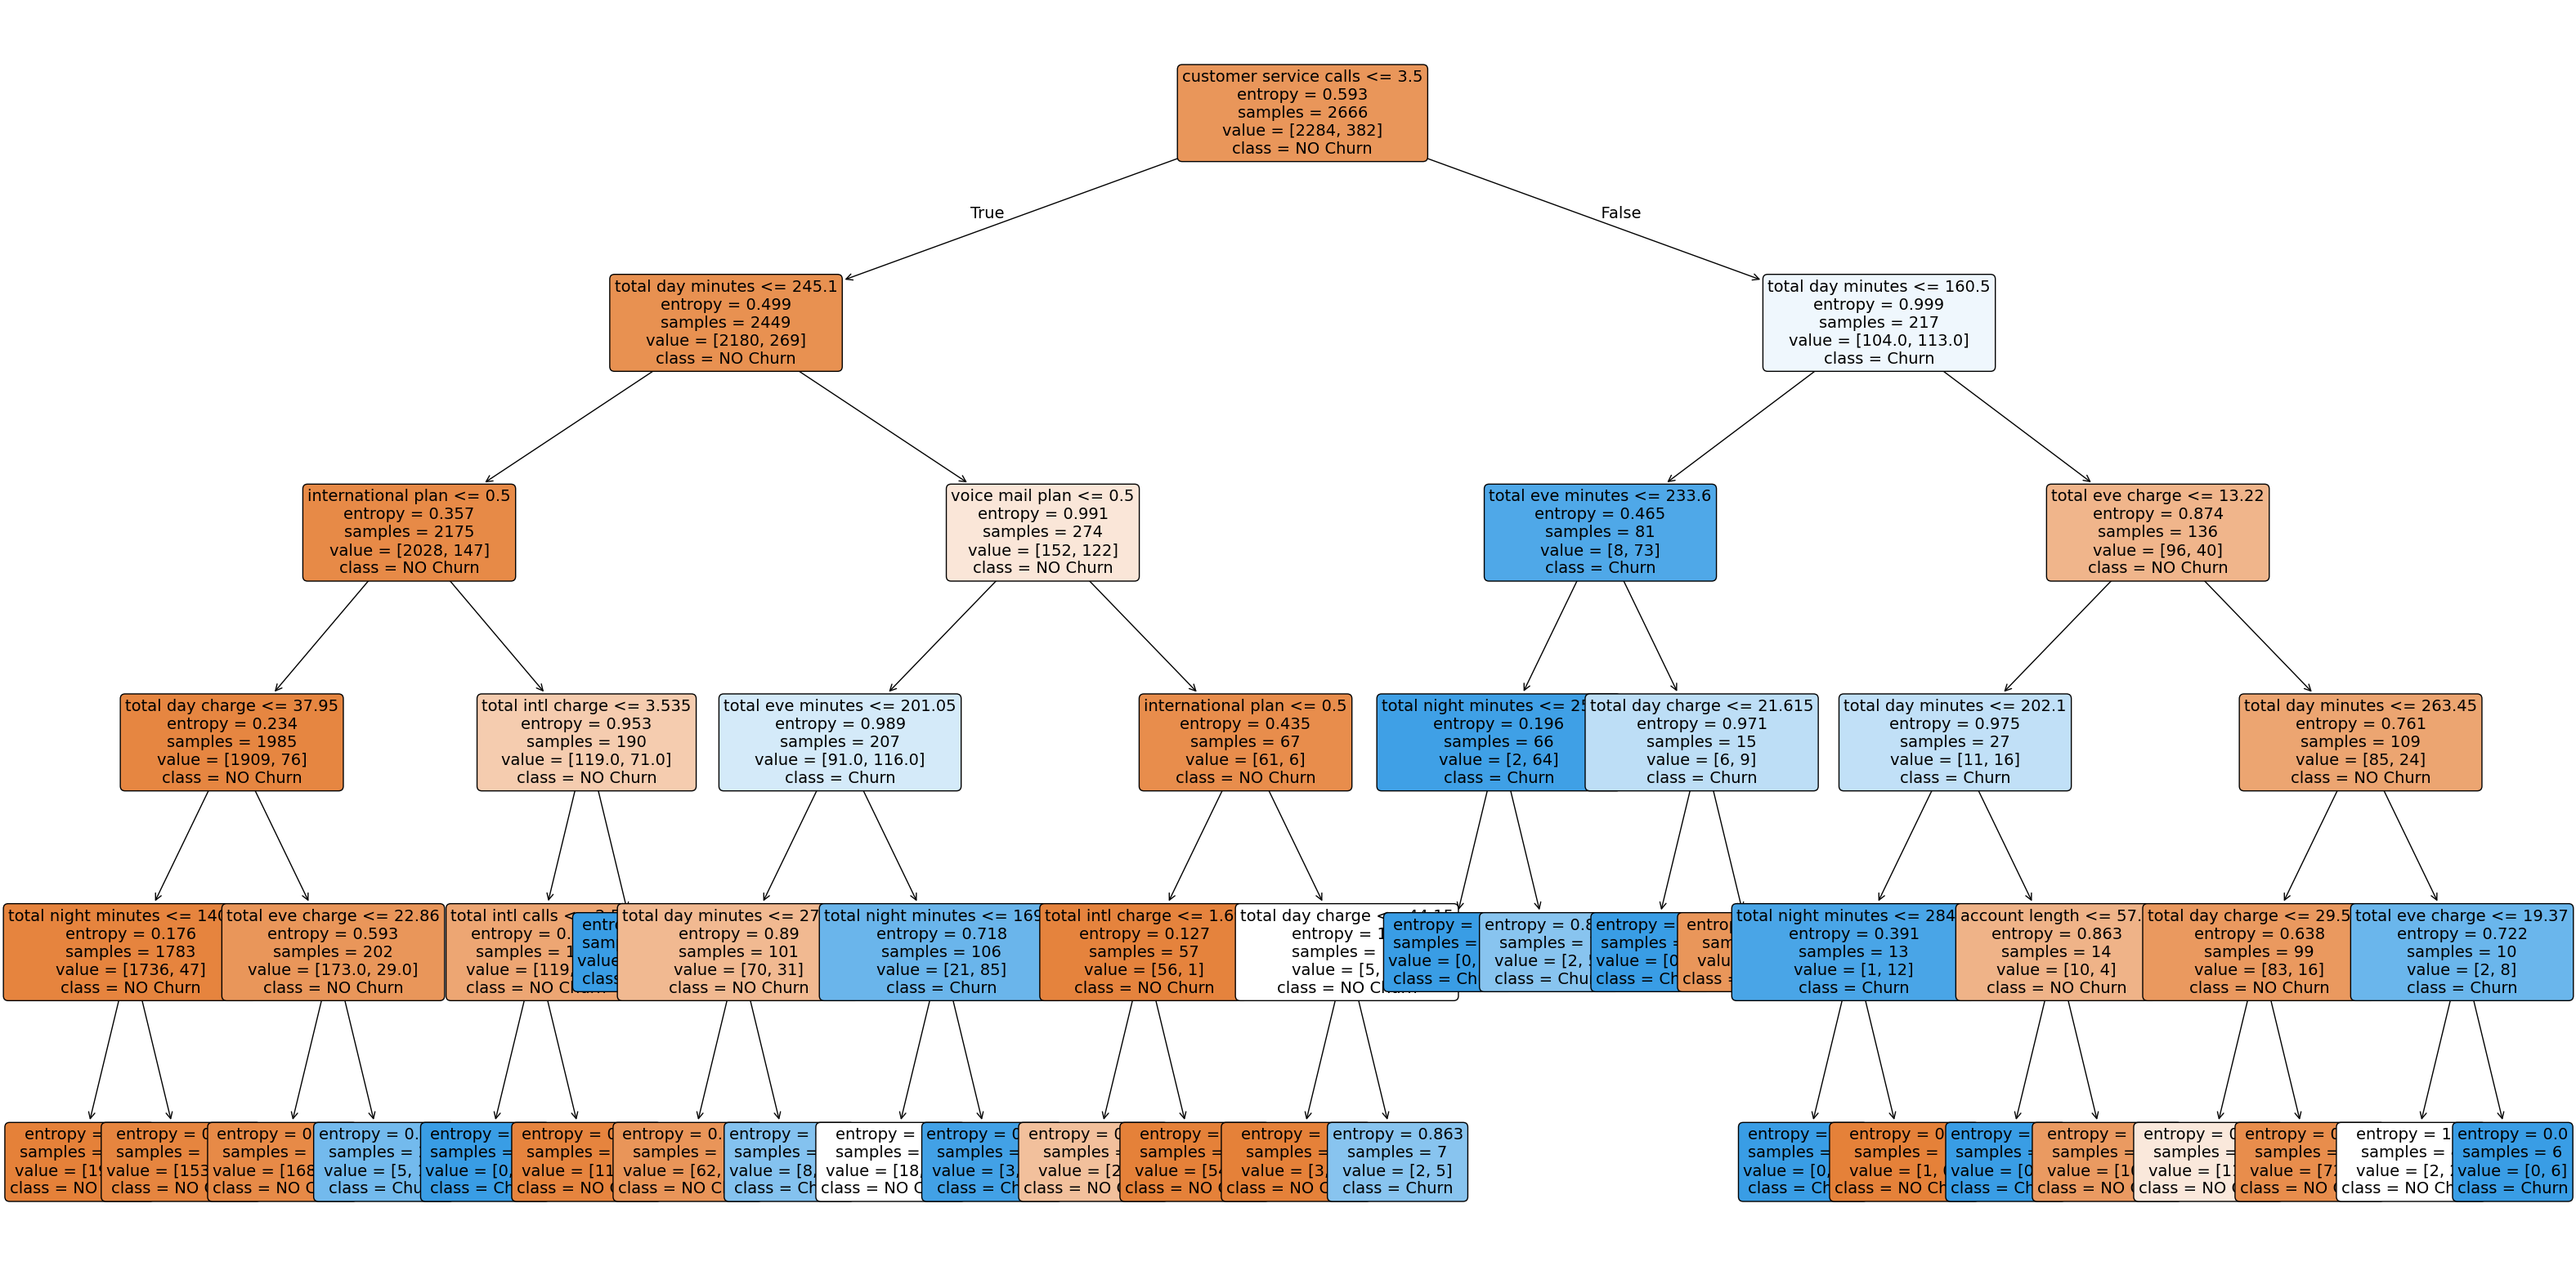

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/telecom_churn.csv')

# Drop kolom yang tidak relevan
df = df.drop(columns=["state","area code", "phone number"])

# Label encoding kolom kategori
le = LabelEncoder()
df['international plan'] = le.fit_transform(df['international plan'])
df['voice mail plan'] = le.fit_transform(df['voice mail plan'])
df['churn'] = df['churn'].astype(int)

# Split fitur dan target
X = df.drop("churn", axis=1)
y = df["churn"]

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10, random_state=42)
model.fit(X_train, y_train)

# Visualisasi tree dengan resolusi yang lebih tinggi dan pengaturan lainnya
plt.figure(figsize=(40,20))# Increased figure size
plot_tree(model,
          feature_names=X.columns,
          class_names=["NO Churn", "Churn"],
          filled=True,
          rounded=True,
          fontsize=14)
plt.show()

In [14]:
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Clasification Report :\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[553  13]
 [ 34  67]]
Clasification Report :
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       566
           1       0.84      0.66      0.74       101

    accuracy                           0.93       667
   macro avg       0.89      0.82      0.85       667
weighted avg       0.93      0.93      0.93       667

Accuracy Score: 0.9295352323838081


In [15]:
# Eksperimen parameter
optimized_model = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_split=5)
optimized_model.fit(X_train, y_train)

# Evaluasi ulang
y_pred_opt = optimized_model.predict(X_test)
print("Akurasi Model setelah Optimasi:", accuracy_score(y_test, y_pred_opt))

Akurasi Model setelah Optimasi: 0.9460269865067467


In [17]:
# Mendapatkan feature importance dari model
feature_importance = model.feature_importances_

# Membuat DataFrame untuk analisis yang lebih mudah
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)


                   Feature  Importance
4        total day minutes    0.289534
1       international plan    0.146160
16  customer service calls    0.145004
14        total intl calls    0.101929
15       total intl charge    0.068721
6         total day charge    0.057289
9         total eve charge    0.053798
7        total eve minutes    0.050591
10     total night minutes    0.043681
2          voice mail plan    0.038872
0           account length    0.004421
3    number vmail messages    0.000000
5          total day calls    0.000000
8          total eve calls    0.000000
11       total night calls    0.000000
12      total night charge    0.000000
13      total intl minutes    0.000000


In [18]:
# Analisis hubungan antara customer service calls dan churn
cs_analysis = df.groupby('customer service calls')['churn'].agg(['count', 'sum', 'mean'])
cs_analysis.columns = ['total_customers', 'churn_count', 'churn_rate']
print("Analisis Customer Service Calls vs Churn Rate:")
print(cs_analysis)

Analisis Customer Service Calls vs Churn Rate:
                        total_customers  churn_count  churn_rate
customer service calls                                          
0                                   697           92    0.131994
1                                  1181          122    0.103302
2                                   759           87    0.114625
3                                   429           44    0.102564
4                                   166           76    0.457831
5                                    66           40    0.606061
6                                    22           14    0.636364
7                                     9            5    0.555556
8                                     2            1    0.500000
9                                     2            2    1.000000


In [24]:
# Analisis penggunaan menit berdasarkan waktu
usage_analysis = df[['total day minutes', 'total eve minutes', 'total night minutes', 'churn']].copy()

# Kategorisasi penggunaan
def categorize_usage(minutes):
    if minutes < 100: return 'Low'
    elif minutes < 200: return 'Medium'
    else: return 'High'

usage_analysis['day_usage_cat'] = usage_analysis['total day minutes'].apply(categorize_usage)
usage_analysis['eve_usage_cat'] = usage_analysis['total eve minutes'].apply(categorize_usage)
usage_analysis['night_usage_cat'] = usage_analysis['total night minutes'].apply(categorize_usage)
# Menampilkan 5 baris pertama dari hasil analisis
print(usage_analysis.head())


   total day minutes  total eve minutes  total night minutes  churn  \
0              265.1              197.4                244.7      0   
1              161.6              195.5                254.4      0   
2              243.4              121.2                162.6      0   
3              299.4               61.9                196.9      0   
4              166.7              148.3                186.9      0   

  day_usage_cat eve_usage_cat night_usage_cat  
0          High        Medium            High  
1        Medium        Medium            High  
2          High        Medium          Medium  
3          High           Low          Medium  
4        Medium        Medium          Medium  
